In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
from salishsea_tools import evaltools as et, viz_tools
import cmocean

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

In [4]:
### Define years in the time series (1991-2020)

Years=np.array([1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,\
                2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]) 

In [5]:
### Create array for NPGO index values from 1991-2020; data from http://www.o3d.org/npgo/npgo.php

Annual_NPGO_index=np.array([-0.50, -1.18, -1.90,-1.21, -1.11,-0.97,-0.73,0.46,1.51,1.89,\
    2.08,1.47,0.96,0.21, -1.38,-0.56,0.42,1.41,0.41,1.24,0.83,1.36,0.12,-0.13, -1.32,-0.03,-0.57,-1.90,-2.19,-1.56])


In [6]:
### Extract zooplankton biomass anomalies from Mackas et al. 2013 Fig. 9

Mackas=[0.08,-0.03,-0.10,-0.03,-0.4,None,0.15,0.33,0.35,0.34,0.10,0.05,-0.13,-0.08,-0.18,-0.10,-0.07,\
        -0.08,-0.06,0.21, None, None, None, None, None, None, None, None,None,None]

## data are from 1995 to 2010 plus None years to get to 2020

In [7]:
### Extract zooplankton biomass anomalies from Perry et al. 2021 Fig. 2d

Perry=[None, None, None, None,None,.115,.1,.315,.272,.183,.112,.05,-.105,-.18,-.258,-.09,-.15,-.02,-.045,\
       .008,.24,.115,.01,-.09,.08,.115,.003,.1,None,None] 

## data are from 1996 to 2018

#### Check lengths of each array

In [8]:
len(Years)

30

In [9]:
len(Annual_NPGO_index)

30

In [10]:
len(Perry)

30

In [11]:
len(Mackas)

30

In [12]:
### Create array for positive NGPO anomalies only for plotting

Annual_NPGO_pos=np.array([0,
0,
0,
0,
    0,
    0,
    0,
    0.46,
    1.51,
    1.89,
    2.08,
    1.47,
    0.96,
    0.21,
    0,
    0,
    0.42,
    1.41,
    0.41,
    1.24,
    0.83,
    1.36,
    0.12,
    0,
    0,
    0,
    0,
    0,
    0,
 0])

In [13]:
### Create array for negative NGPO anomalies only for plotting

Annual_NPGO_neg=np.array([-0.50,
-1.18,
-1.90,
-1.21,
    -1.11,
    -0.97,
    -0.73,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    -1.38,
    -0.56,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    -0.13,
    -1.32,
    -0.03,
    -0.57,
    -1.90,
    -2.19,
 -1.56])

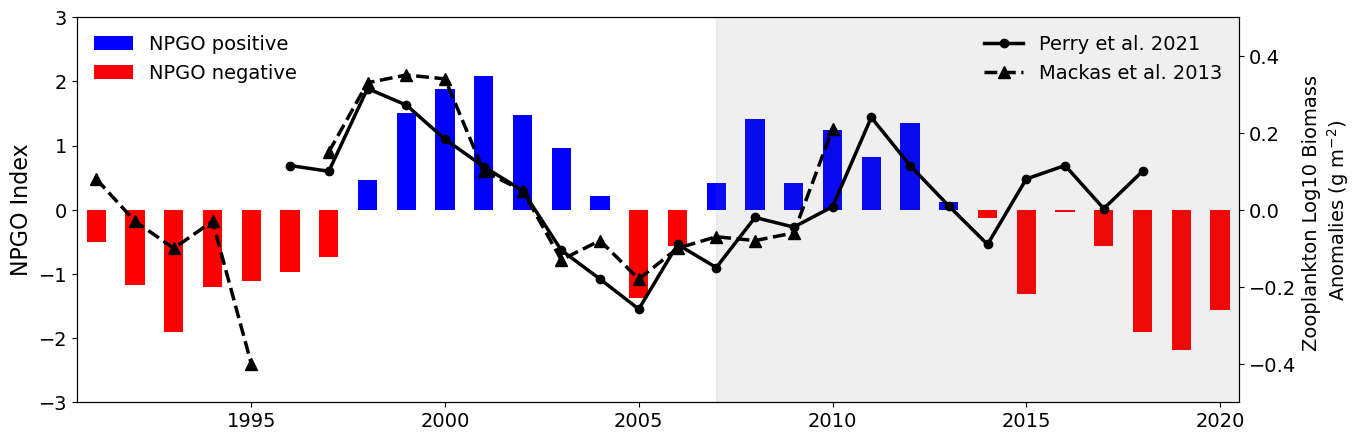

In [14]:
fig, ax1 = plt.subplots(figsize=(15, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
ax2 = ax1.twinx()
colors=['r','r','r','r','r','r','r',
    'b','b','b','b','b','b','b',
    'r','r',
        'b','b','b','b','b','b','b','r','r','b','r','r','r','r']

#ax1.bar(Years, Annual_NPGO_index, width=.5, color=colors,label='NPGO Index')
ax1.bar(Years,Annual_NPGO_pos,width=0.5,color='b',label='NPGO positive')
ax1.bar(Years,Annual_NPGO_neg,width=0.5,color='r',label='NPGO negative')
ax2.plot(Years,Perry,color='k',marker='o',linewidth=2.5,label='Perry et al. 2021')
ax2.plot(Years,Mackas,color='k',marker='^',markersize=8,linestyle='--',linewidth=2.5,label='Mackas et al. 2013')
ax1.set_ylim(-3,3)
ax1.set_xlim(1990.5,2020.5)
ax2.set_ylim(-.5,.5)
ax1.set_ylabel('NPGO Index',fontsize=16)
ax2.set_ylabel('Zooplankton Log10 Biomass \nAnomalies (g m$^{-2}$)',fontsize=14)
ax1.set_title('',fontsize=18) #NPGO vs. Perry et al. 2021 Zooplankton Anomalies
ax1.legend(frameon=False,loc=2,fontsize=14)
ax2.legend(frameon=False,loc=1,fontsize=14)
a=2007
b=2021
plt.fill([a, a, b, b], [-3, 3, 3, -3], color = 'dimgrey', alpha = 0.1)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_tick_params(labelsize=14)

#plt.savefig('Fig2_NPGOvsZoopBiomassAnomalies.png', bbox_inches='tight',dpi=1000,transparent=False)